In [92]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [93]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
k = 140  # количество выборок для случайной величины W


In [109]:
# 1.1 Интервальная оценка для математического ожидания при известной дисперсии
# Примечание - в scipy.stats нет модуля interval, поэтому использовать второй способ невозможно
X = np.random.normal(a, sigma, size=n)
t_gamma = st.norm.ppf(1/2 + gamma/2)
a_left_known = X.mean() - sigma * t_gamma / np.sqrt(n)
a_right_known = X.mean() + sigma * t_gamma / np.sqrt(n)
print("1.1. Доверительный интервал (известная дисперсия):", (a_left_known, a_right_known))

print("1.1. Доверительный интервал (известная дисперсия, метод interval): ", st.norm.interval(confidence=gamma, loc=X.mean(), scale=sigma/np.sqrt(n)))


1.1. Доверительный интервал (известная дисперсия): (-0.42493293853685316, 0.054597948559776455)
1.1. Доверительный интервал (известная дисперсия, метод interval):  (-0.424932938536853, 0.0545979485597764)


In [117]:
# 1.2 Интервальная оценка для математического ожидания при неизвестной дисперсии
sigma_estimate = np.std(X, ddof=1)
t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
print("1.2. Доверительный интервал (неизвестная дисперсия):", (a_left_unknown, a_right_unknown))
print("1.2. Доверительный интервал (неизвестная дисперсия, метод interval): ", st.t.interval(confidence=gamma, loc=X.mean(), scale=sigma_estimate/np.sqrt(n), df=n-1))


1.2. Доверительный интервал (неизвестная дисперсия): (-0.4217346022214808, 0.05139961224440409)
1.2. Доверительный интервал (неизвестная дисперсия, метод interval):  (-0.42173460222148074, 0.05139961224440412)


In [96]:
# 1.3 Интервальная оценка для дисперсии
delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
s2 = np.var(X, ddof=1)
sigma2_left = (n - 1) * s2 / delta_0
sigma2_right = (n - 1) * s2 / delta_1
print("1.3. Доверительный интервал для дисперсии:", (sigma2_left, sigma2_right))


1.3. Доверительный интервал для дисперсии: (1.3637570326957051, 4.204268972356296)


In [97]:
# 2. Зависимость длины доверительного интервала от надежности
V = 500
gamma_values = np.linspace(0.7, 0.999, V)
interval_lengths_mx = []
interval_lengths_var = []
interval_lengths_mx_unknown = []

for g in gamma_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    interval_lengths_mx_unknown.append(interval_mx_unknown)
    interval_lengths_mx.append(interval_mx)
    interval_lengths_var.append(interval_var)


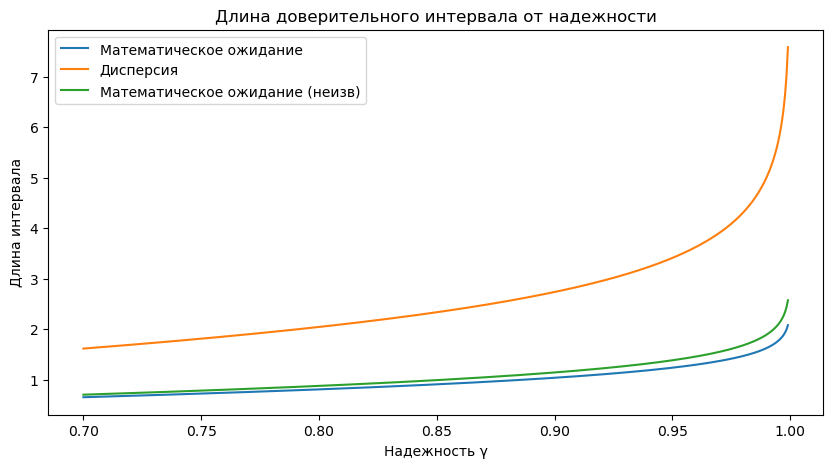

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, interval_lengths_mx, label="Математическое ожидание")
plt.plot(gamma_values, interval_lengths_var, label="Дисперсия")
plt.plot(gamma_values, interval_lengths_mx_unknown, label="Математическое ожидание (неизв)")
plt.xlabel("Надежность γ")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от надежности")
plt.show()

In [99]:
# 3. Зависимость длины интервала от объема выборки
n_values = range(4, 101)
lengths_mx = []
lengths_mx_unk = []
lengths_var = []

for n in n_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    lengths_mx_unk.append(interval_mx_unknown)
    lengths_mx.append(interval_mx)
    lengths_var.append(interval_var)

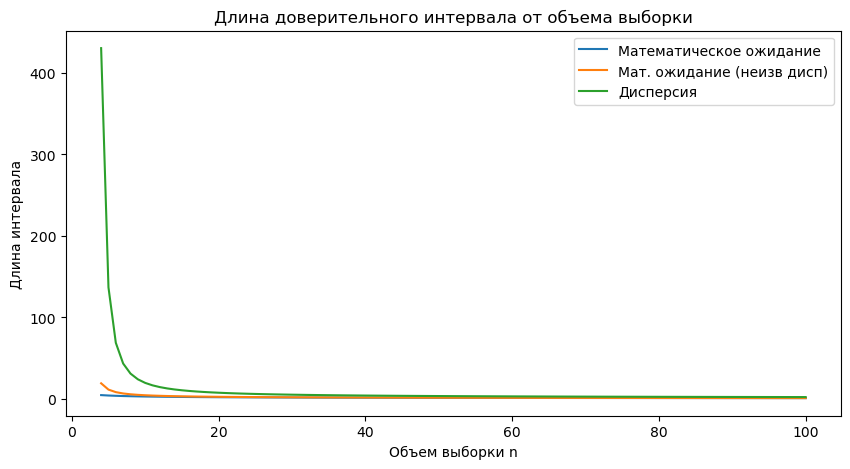

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, lengths_mx, label="Математическое ожидание")
plt.plot(n_values, lengths_mx_unk, label="Мат. ожидание (неизв дисп)")
plt.plot(n_values, lengths_var, label="Дисперсия")
plt.xlabel("Объем выборки n")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от объема выборки")
plt.show()

In [119]:
# 4. Оценка γ* при неизвестной дисперсии
count_gamma = 0
confidence_array = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
    a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
    a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
    confidence_array.append((a_left_unknown, a_right_unknown))
    if a_left_unknown <= a <= a_right_unknown:
        count_gamma +=1


print("Доверительный интервал для каждой из M выборок: ")
print(confidence_array)
gamma_star = count_gamma / M
print("4. Фактическая γ*:", gamma_star)

Доверительный интервал для каждой из M выборок: 
[(-0.4973316628809477, -0.024197448415062828), (0.004638289797882417, 0.4777725042637673), (-0.2877215716142499, 0.18541264285163497), (-0.20333660073573037, 0.26979761373015454), (-0.259095657931444, 0.2140385565344409), (-0.2957489705155549, 0.17738524395033), (-0.19178534185630233, 0.2813488726095825), (-0.0932969945147181, 0.3798372199511668), (-0.23655110675675753, 0.23658310770912735), (-0.29350930097315236, 0.17962491349273252), (-0.32206658733618343, 0.15106762712970148), (-0.057818692411802375, 0.4153155220540825), (-0.23970231363241365, 0.23343190083347123), (-0.3430496637591708, 0.1300845507067141), (-0.07244408516898593, 0.40069012929689896), (-0.2935422368812208, 0.17959197758466408), (-0.32271253279523804, 0.15042168167064685), (-0.2981303602952312, 0.17500385417065367), (-0.3860052324363399, 0.08712898202954503), (-0.2966934287928369, 0.176440785673048), (-0.09113601128879056, 0.3819982031770943), (-0.08667666498629553, 0.

In [102]:
# 5. Анализ случайной величины Z
Z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s_2 = np.var(X, ddof=1)
    Z = (X.mean() - a) / (np.sqrt(s_2) / np.sqrt(n))
    Z_values.append(Z)
Z_values


[-0.27412777144564604,
 -0.9839584642058772,
 -1.683856358428708,
 -1.0557894051167662,
 -0.1872650323417064,
 1.111964322657101,
 1.3868386974853235,
 0.24307988445287285,
 -1.7710095559592904,
 0.36017387592389366,
 0.4161688772810893,
 -0.8487980932988627,
 -0.3666215174743305,
 0.8199343377623879,
 1.1518280754090593,
 -1.0777948712813186,
 0.7739486815139649,
 0.2324562070853356,
 -1.0276897373908198,
 -0.28261281973627295,
 2.327492288838876,
 0.9604483660404008,
 1.3385983300661164,
 -0.8071714765662613,
 3.0233262881161034,
 0.3954521051296557,
 1.192917963258431,
 0.21462343895436545,
 -1.9558105304318778,
 1.3251695121950269,
 0.4136259265589799,
 -0.659690069956011,
 -0.47575232973437204,
 0.9258280185614114,
 -0.3002921503272689,
 -0.9092649285416382,
 0.021278357347958212,
 0.9018261784035859,
 1.1332035333121107,
 -1.060074036793753,
 -1.7897122345294132,
 -0.47064935818354964,
 1.0260525593485756,
 -0.699299843444103,
 1.578927281332071,
 0.9093340036515499,
 0.561809276

In [103]:
# 5.1 Вычисление характеристик
Z_values = np.array(Z_values)
mean_Z = np.mean(Z_values)
var_Z = np.var(Z_values)
skew_Z = st.skew(Z_values)
kurt_Z = st.kurtosis(Z_values)
print(f"5.1. Характеристики Z: Среднее={mean_Z}, Дисперсия={var_Z}, Асимметрия={skew_Z}, Эксцесс={kurt_Z}")


5.1. Характеристики Z: Среднее=0.054648964157714836, Дисперсия=1.0644897427652944, Асимметрия=0.0007010656812091071, Эксцесс=-0.026525430125237115


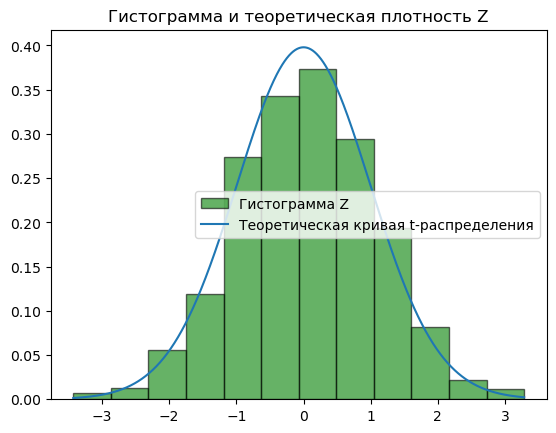

In [104]:
# 5.2 Построение графиков
plt.hist(Z_values, bins="sturges", density=True, alpha=0.6, color='g', edgecolor = 'black', label="Гистограмма Z")
x = np.linspace(min(Z_values), max(Z_values), 1000)
plt.plot(x, st.t.pdf(x, df=n-1), label="Теоретическая кривая t-распределения")
plt.legend()
plt.title("Гистограмма и теоретическая плотность Z")
plt.show()

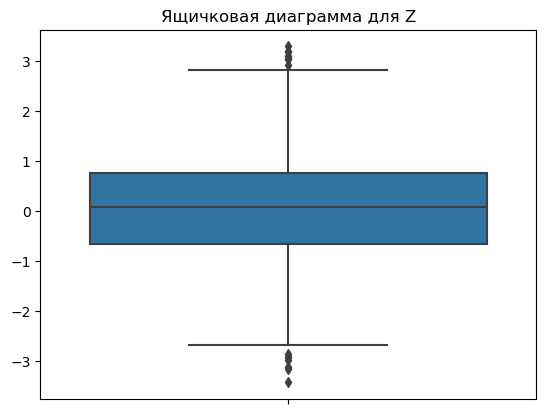

Фактическое количество выбросов: 15


In [105]:
sb.boxplot(y = Z_values)
plt.title("Ящичковая диаграмма для Z")
plt.show()
q1 = np.percentile(Z_values, 25)
q3 = np.percentile(Z_values, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in Z_values:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")